# SHAP values calculation for Individual Classifiers

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import shap
import warnings
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Xi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\Xi.csv')
Xi_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\Xi_hold.csv')
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold.csv')
y_hold_nssi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_nssi.csv')
y_hold_si=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_si.csv')

In [3]:
#Dropping the sitbs column as we are only interested in predicting each component outcome with the chained classifier
y=y.drop(columns='sitbs')

In [10]:
#Suppressing warnings when calculating SHAP values. Warnings appears because the dataset does not have feature names as they are arrays while the model has previously been fitted on pandas dataframes with feature names
#This is ok because the features are in the same order as the original test set
warnings.simplefilter(action='ignore', category=UserWarning)
#Loading the previously fitted classifier 
si_model=joblib.load(r'c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\models\RF_si_Uncalibrated.sav')
#Fitting the explainer and calculating shap values
explainer_si=shap.Explainer(model=si_model, algorithm='tree', seed=26)
i_si_shap=explainer_si.shap_values(X=Xi_hold.head(200))

In [15]:
#Self-harm related questions (except hs54e- no. of suicide attempts) are coded as 1 Yes 2 No, recode to 0 No 1 Yes
#Saving a dataframe for the first 200 participants in the holdout data 
Xi_hold_200=Xi_hold.head(200)
shvar=['hs54a', 'hs54b', 'hs54c', 'hs54d', 'hs54f']
for v in shvar:
    Xi_hold_200[v]=Xi_hold_200[v].replace({2:0})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SI Beeswarm Plot


([<matplotlib.axis.YTick at 0x21695b46f80>,
 [Text(0, 0, 'CHU9D score'),
  Text(0, 1, 'Depressed feelings'),
  Text(0, 2, 'SDQ emotional symptoms'),
  Text(0, 3, 'Prior suicidal ideation'),
  Text(0, 4, 'Prior suicide plan')])

Text(0.5, 1.0, 'Suicidal Ideation Beeswarm Plot')

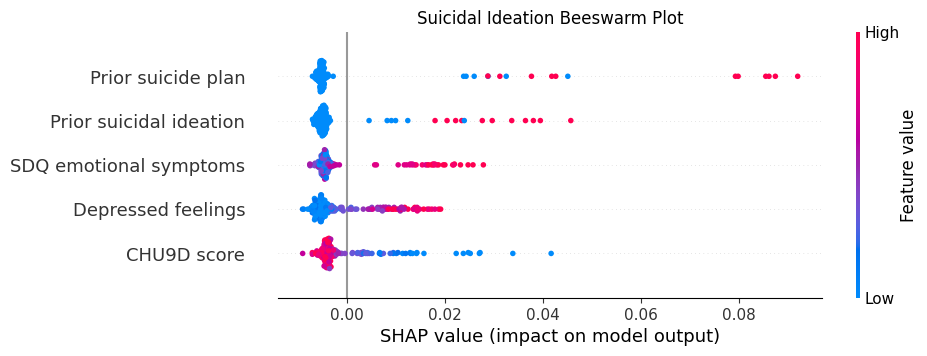

In [26]:
#Note that shap.initjs() needs to be run to produce the visualisations- otherwise there will be an error that says Javascript library not omitted
shap.initjs()
print('SI Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False to avoid calling matplotlib.pyplot.show() before the extra customisation code occurs
shap.summary_plot(i_si_shap[1], features=Xi_hold_200, max_display=5, show=False)
si_flabels=['Prior suicide plan', 'Prior suicidal ideation', 'SDQ emotional symptoms','Depressed feelings', 'CHU9D score']
si_flabels.reverse()
#Insert labels=si_flabels below when available
plt.yticks(range(5), labels=si_flabels)
plt.title('Suicidal Ideation Beeswarm Plot')
plt.show()

In [20]:
#Loading the previously fitted classifier 
nssi_model=joblib.load(r'c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\models\RF_nssi_Uncalibrated.sav')
#Fitting the explainer and calculating shap values
explainer_nssi=shap.Explainer(model=nssi_model, algorithm='tree', seed=26)
i_nssi_shap=explainer_nssi.shap_values(X=Xi_hold.head(200))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


hs54b
0.0    185
1.0      9
0.5      6
Name: count, dtype: int64

NSSI Beeswarm Plot


([<matplotlib.axis.YTick at 0x21695c23a60>,
 [Text(0, 0, 'CHU9D score'),
  Text(0, 1, 'Prior suicide plan'),
  Text(0, 2, 'Depressed feelings'),
  Text(0, 3, 'Prior self-harm thoughts'),
  Text(0, 4, 'Prior self-harm')])

Text(0.5, 1.0, 'NSSI Beeswarm Plot')

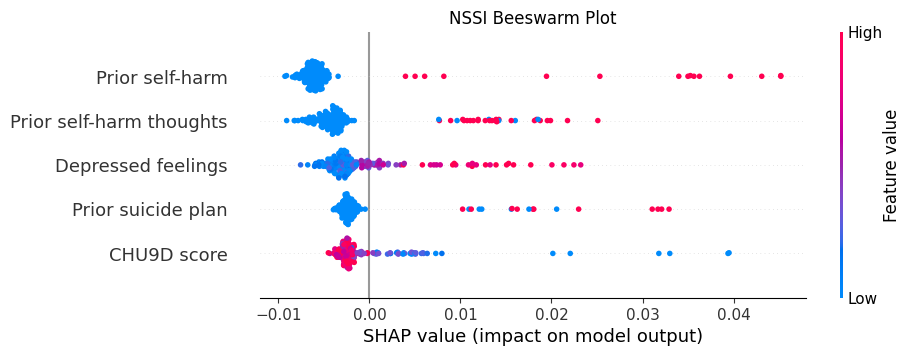

In [27]:
#Just changing the missing values for hs54b to another arbitrary value because the negative values make the graphs look strange
Xi_hold_200['hs54b']=Xi_hold_200['hs54b'].replace({-9:0.5})
Xi_hold_200['hs54b'].value_counts()

#Note that shap.initjs() needs to be run to produce the visualisations- otherwise there will be an error that says Javascript library not omitted
shap.initjs()
print('NSSI Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False to avoid calling matplotlib.pyplot.show() before the extra customisation code occurs
shap.summary_plot(i_nssi_shap[1], features=Xi_hold_200, max_display=5, show=False)
nssi_flabels=['Prior self-harm', 'Prior self-harm thoughts', 'Depressed feelings', 'Prior suicide plan', 'CHU9D score']
nssi_flabels.reverse()
plt.yticks(range(5), labels=nssi_flabels)
plt.title('NSSI Beeswarm Plot')
plt.show()

In [29]:
#Loading the previously fitted classifier 
att_model=joblib.load(r'c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\models\RF_att_Uncalibrated.sav')
#Fitting the explainer and calculating shap values
explainer_att=shap.Explainer(model=att_model, algorithm='tree',seed=26)
i_att_shap=explainer_att.shap_values(X=Xi_hold.head(200))

y9test
 0.277500    137
 0.275579     39
-3.608216     15
 0.279420      9
Name: count, dtype: int64

Attempts Beeswarm Plot


([<matplotlib.axis.YTick at 0x2169770b130>,
 [Text(0, 0, 'Prior self-harm thoughts'),
  Text(0, 1, 'PedsQL psychosocial health'),
  Text(0, 2, 'Prior suicide plan'),
  Text(0, 3, 'Year 9 Assessment Year'),
  Text(0, 4, 'Worry something bad will happen')])

Text(0.5, 1.0, 'Suicide Attempts Beeswarm Plot')

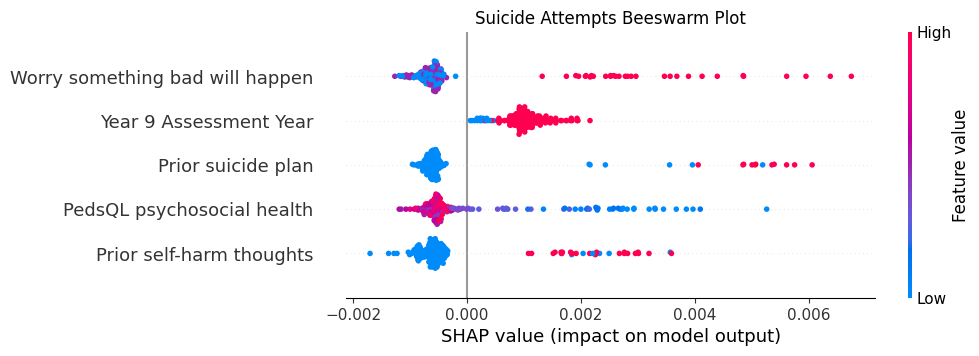

In [35]:

Xi_hold_200['y9test'].value_counts()
print('Attempts Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False to avoid calling matplotlib.pyplot.show() before the extra customisation code occurs
shap.summary_plot(i_att_shap[1], features=Xi_hold_200, max_display=5, show=False)
att_flabels=['Worry something bad will happen', 'Year 9 Assessment Year', 'Prior suicide plan', 'PedsQL psychosocial health', 'Prior self-harm thoughts']
att_flabels.reverse()
plt.yticks(range(5), labels=att_flabels)
plt.title('Suicide Attempts Beeswarm Plot')
plt.show()

([<matplotlib.axis.YTick at 0x216979b7e50>,
 [Text(0, 0, 'CHU9D score'),
  Text(0, 1, 'Depressed feelings'),
  Text(0, 2, 'SDQ emotional symptoms'),
  Text(0, 3, 'Prior suicidal ideation'),
  Text(0, 4, 'Prior suicide plan')])

Text(0.5, 1.0, 'Suicidal Ideation Bar Plot')

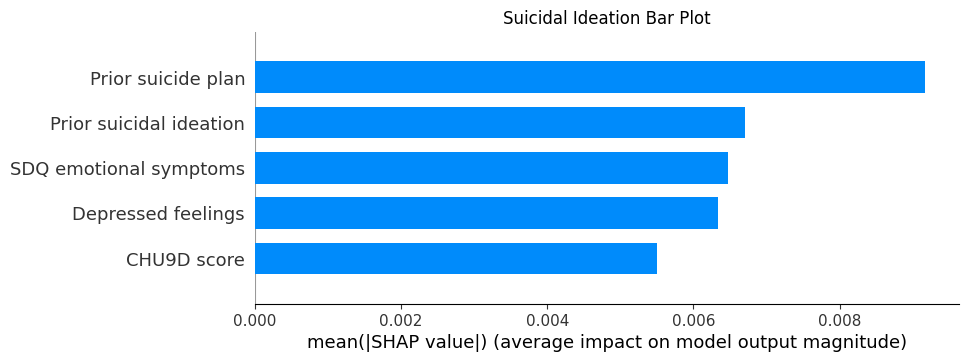

In [41]:
shap.summary_plot(i_si_shap[1], features=Xi_hold_200, plot_type='bar', max_display=5, show=False)
plt.yticks(range(5), labels=si_flabels)
plt.title('Suicidal Ideation Bar Plot')

([<matplotlib.axis.YTick at 0x21697a2add0>,
 [Text(0, 0, 'CHU9D score'),
  Text(0, 1, 'Prior suicide plan'),
  Text(0, 2, 'Depressed feelings'),
  Text(0, 3, 'Prior self-harm thoughts'),
  Text(0, 4, 'Prior self-harm')])

Text(0.5, 1.0, 'NSSI Bar Plot')

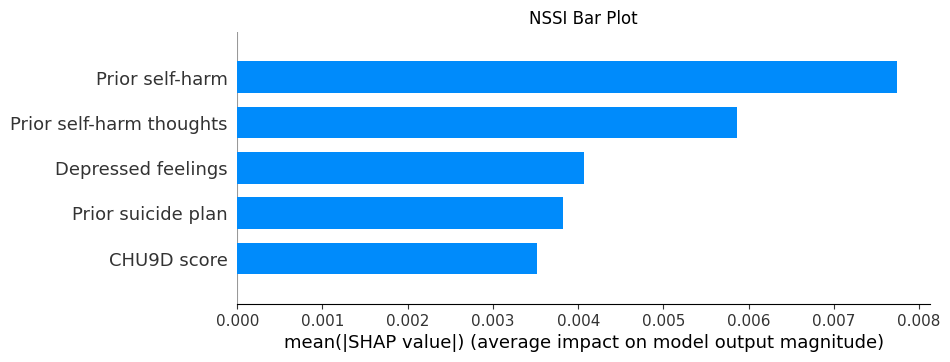

In [42]:
shap.summary_plot(i_nssi_shap[1], features=Xi_hold_200, plot_type='bar', max_display=5, show=False)
plt.yticks(range(5), labels=nssi_flabels)
plt.title('NSSI Bar Plot')

([<matplotlib.axis.YTick at 0x216981e8d30>,
 [Text(0, 0, 'Prior self-harm thoughts'),
  Text(0, 1, 'PedsQL psychosocial health'),
  Text(0, 2, 'Prior suicide plan'),
  Text(0, 3, 'Year 9 Assessment Year'),
  Text(0, 4, 'Worry something bad will happen')])

Text(0.5, 1.0, 'Suicide Attempts Bar Plot')

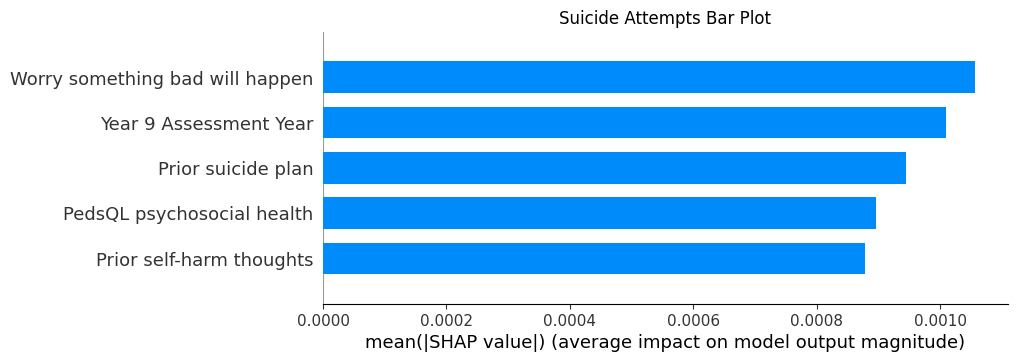

In [43]:
shap.summary_plot(i_att_shap[1], features=Xi_hold_200, plot_type='bar', max_display=5, show=False)
plt.yticks(range(5), labels=att_flabels)
plt.title('Suicide Attempts Bar Plot')